<a href="https://colab.research.google.com/github/vinods03/deep_learning/blob/main/CNN_Celebrity_Actors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [3]:
base_dir = '/content/drive/MyDrive/Celebrity Faces Dataset'

In [4]:
import os

dataset = []
for i in os.listdir(base_dir):
  dataset.append(os.path.join(base_dir, i))

dataset

['/content/drive/MyDrive/Celebrity Faces Dataset/Scarlett Johansson',
 '/content/drive/MyDrive/Celebrity Faces Dataset/Tom Cruise',
 '/content/drive/MyDrive/Celebrity Faces Dataset/Megan Fox',
 '/content/drive/MyDrive/Celebrity Faces Dataset/Nicole Kidman',
 '/content/drive/MyDrive/Celebrity Faces Dataset/Sandra Bullock',
 '/content/drive/MyDrive/Celebrity Faces Dataset/Robert Downey Jr',
 '/content/drive/MyDrive/Celebrity Faces Dataset/Leonardo DiCaprio',
 '/content/drive/MyDrive/Celebrity Faces Dataset/Natalie Portman',
 '/content/drive/MyDrive/Celebrity Faces Dataset/Will Smith',
 '/content/drive/MyDrive/Celebrity Faces Dataset/Tom Hanks',
 '/content/drive/MyDrive/Celebrity Faces Dataset/Kate Winslet',
 '/content/drive/MyDrive/Celebrity Faces Dataset/Angelina Jolie',
 '/content/drive/MyDrive/Celebrity Faces Dataset/Brad Pitt',
 '/content/drive/MyDrive/Celebrity Faces Dataset/Denzel Washington',
 '/content/drive/MyDrive/Celebrity Faces Dataset/Jennifer Lawrence',
 '/content/drive/MyD

In [5]:
for i in dataset:
  label = i.split('/')[-1]
  print('The number of images under', label, 'is', len(os.listdir(i)))

The number of images under Scarlett Johansson is 200
The number of images under Tom Cruise is 100
The number of images under Megan Fox is 100
The number of images under Nicole Kidman is 100
The number of images under Sandra Bullock is 100
The number of images under Robert Downey Jr is 100
The number of images under Leonardo DiCaprio is 100
The number of images under Natalie Portman is 100
The number of images under Will Smith is 100
The number of images under Tom Hanks is 100
The number of images under Kate Winslet is 100
The number of images under Angelina Jolie is 100
The number of images under Brad Pitt is 100
The number of images under Denzel Washington is 100
The number of images under Jennifer Lawrence is 100
The number of images under Johnny Depp is 100
The number of images under Hugh Jackman is 100


In [6]:
translate = {'Scarlett Johansson': 0, 'Tom Cruise': 1, 'Megan Fox': 2, 'Nicole Kidman': 3, 'Sandra Bullock': 4, 'Robert Downey Jr': 5, 'Leonardo DiCaprio': 6, 'Natalie Portman': 7,
             'Will Smith': 8, 'Tom Hanks': 9, 'Kate Winslet': 10, 'Angelina Jolie': 11, 'Brad Pitt': 12, 'Denzel Washington': 13, 'Jennifer Lawrence': 14, 'Johnny Depp': 15, 'Hugh Jackman': 16}

In [7]:
translate['Will Smith']

8

In [8]:
# convert 1 sample image into a 3D array

from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Celebrity Faces Dataset/Tom Cruise/100_32a5d9d1.jpg')
img = img_to_array(img)
img = img / 255
img
print(img.shape)


(567, 474, 3)


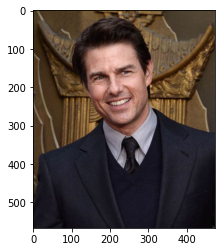

In [9]:
# get the image back from the array

import matplotlib.pyplot as plt
plt.imshow(img)

In [10]:
image_array = []
image_label = []

for i in dataset:
  for (n,j) in enumerate(os.listdir(i)):
    img_path = os.path.join(i,j)
    img = load_img(img_path, target_size = (256, 256))
    img = img_to_array(img)
    img = img/255
    image_array.append(img)
    label = i.split('/')[-1]
    image_label.append(translate[label])




In [11]:
image_array[0][0][0]
set(image_label)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

In [12]:
import numpy as np

image_array = np.array(image_array)
image_label = np.array(image_label)

print(image_array.shape)
print(image_label.shape)

(1800, 256, 256, 3)
(1800,)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_array, image_label, test_size = 0.2)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1440, 256, 256, 3)
(360, 256, 256, 3)
(1440,)
(360,)


In [15]:
c = len(set(y_train))
print(c)

d = len(set(y_test))
print(d)

17
17


In [16]:
# Build the model

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, GlobalMaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model

In [17]:
X_train[0].shape

i = Input(shape = X_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation = 'relu', padding = 'same')(i)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), strides =  2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
# x = Conv2D(512, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
# x = BatchNormalization()(x)

x = Flatten()(x)
# x = GlobalMaxPooling2D()(x)

x = Dropout(0.1)(x)
x = Dense(512, activation = 'relu')(x)

x = Dropout(0.1)(x)
x = Dense(256, activation = 'relu')(x)

# x = Dropout(0.2)(x)
x = Dense(128, activation = 'relu')(x)

# x = Dropout(0.2)(x)
# x = Dense(64, activation = 'relu')(x)


x = Dropout(0.2)(x)
x = Dense(c, activation = 'softmax')(x)

m = Model(i,x)


In [18]:
# compile and fit the model

m.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
r = m.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20)

Epoch 1/20
45/45 [==============================] - 14s 68ms/step - loss: 2.8594 - accuracy: 0.1069 - val_loss: 3.0069 - val_accuracy: 0.1111
Epoch 2/20
45/45 [==============================] - 2s 51ms/step - loss: 2.5253 - accuracy: 0.1868 - val_loss: 3.2138 - val_accuracy: 0.0889
Epoch 3/20
45/45 [==============================] - 2s 51ms/step - loss: 2.2695 - accuracy: 0.2465 - val_loss: 3.5323 - val_accuracy: 0.0694
Epoch 4/20
45/45 [==============================] - 2s 51ms/step - loss: 2.1006 - accuracy: 0.3056 - val_loss: 5.2275 - val_accuracy: 0.1278
Epoch 5/20
45/45 [==============================] - 2s 52ms/step - loss: 1.9761 - accuracy: 0.3160 - val_loss: 4.7786 - val_accuracy: 0.0972
Epoch 6/20
45/45 [==============================] - 2s 52ms/step - loss: 1.7561 - accuracy: 0.4187 - val_loss: 3.9565 - val_accuracy: 0.1000
Epoch 7/20
45/45 [==============================] - 2s 51ms/step - loss: 1.5170 - accuracy: 0.4847 - val_loss: 3.3164 - val_accuracy: 0.1111
Epoch 8/20
4

In [19]:
# Data Augmentation

batch_size = 24
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1)
train_generator = data_generator.flow(image_array, image_label, batch_size)
steps_per_epoch = image_array.shape[0] // batch_size

r = m.fit_generator(train_generator, validation_data = (X_test, y_test), steps_per_epoch = steps_per_epoch, epochs = 20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
75/75 [==============================] - 22s 290ms/step - loss: 2.2320 - accuracy: 0.3456 - val_loss: 2.4973 - val_accuracy: 0.2778
Epoch 2/20
75/75 [==============================] - 23s 312ms/step - loss: 1.7586 - accuracy: 0.4311 - val_loss: 2.5434 - val_accuracy: 0.3361
Epoch 3/20
75/75 [==============================] - 22s 290ms/step - loss: 1.5889 - accuracy: 0.5028 - val_loss: 1.7843 - val_accuracy: 0.4528
Epoch 4/20
75/75 [==============================] - 22s 288ms/step - loss: 1.4234 - accuracy: 0.5439 - val_loss: 1.3042 - val_accuracy: 0.6000
Epoch 5/20
75/75 [==============================] - 22s 292ms/step - loss: 1.2857 - accuracy: 0.5894 - val_loss: 1.4942 - val_accuracy: 0.5333
Epoch 6/20
75/75 [==============================] - 23s 311ms/step - loss: 1.2841 - accuracy: 0.5967 - val_loss: 1.5529 - val_accuracy: 0.5306
Epoch 7/20
75/75 [==============================] - 22s 294ms/step - loss: 1.1642 - accuracy: 0.6317 - val_loss: 0.9846 - val_accuracy: 0.6806

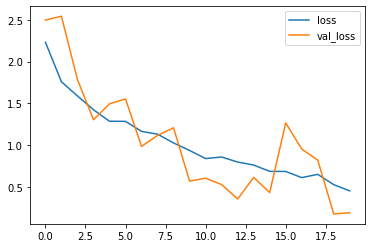

In [20]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

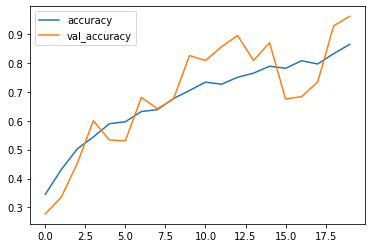

In [21]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [22]:
y_test_pred = m.predict(X_test)

In [23]:
# y_test

In [24]:
y_test_pred

array([[8.3329314e-06, 8.8748534e-04, 4.5748328e-07, ..., 2.5445934e-05,
        3.5866399e-04, 4.4611199e-03],
       [9.5981705e-01, 4.3699474e-05, 1.0520406e-06, ..., 1.8799983e-05,
        1.2883671e-05, 3.9461925e-06],
       [1.6783135e-07, 4.3302542e-05, 3.4660868e-09, ..., 3.6207119e-08,
        1.0511695e-05, 9.8778069e-01],
       ...,
       [5.7269990e-08, 2.2387653e-06, 2.1262278e-07, ..., 7.1082226e-08,
        1.4315397e-04, 9.7428465e-06],
       [1.3808288e-04, 8.1640437e-06, 7.2043240e-03, ..., 1.5509329e-03,
        2.1811877e-04, 4.9751901e-07],
       [5.3237218e-06, 2.4465234e-09, 3.5042042e-08, ..., 7.1664331e-08,
        7.2924955e-10, 6.4620226e-11]], dtype=float32)

In [25]:
y_test_pred_decoded = []

for i in range(0,len(y_test_pred)):
  for j in range(0,17):
    if (y_test_pred[i][j]) == max(y_test_pred[i]):
      y_test_pred_decoded.append(j)

# y_test_pred_decoded

In [26]:
a = [1,2,3,4,5]
max(a)

5

In [27]:
import sklearn.metrics as metrics
accuracy = metrics.accuracy_score(y_test, y_test_pred_decoded)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_test_pred_decoded, average = 'weighted')
recall = metrics.recall_score(y_test, y_test_pred_decoded, average = 'weighted')
f1 = metrics.f1_score(y_test, y_test_pred_decoded, average = 'weighted')
cm = metrics.confusion_matrix(y_test, y_test_pred_decoded)

print('accuracy:', accuracy)
print('error:', error)
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)

print('\n')
print('Confusion Matrix')
print('\n')
print(cm)

from sklearn.metrics import classification_report
print('\n')
print(classification_report(y_test, y_test_pred_decoded))
      


accuracy: 0.9611111111111111
error: 0.03888888888888886
precision: 0.9632675123295356
recall: 0.9611111111111111
f1: 0.9606912820359246


Confusion Matrix


[[41  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0 19  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0 25  0  0  0]
 [ 1  0  0  0  0  0  0  2  0  0  0  0  0  0 13  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  

In [28]:
# Test one image

img = load_img('/content/drive/MyDrive/Celebrity Faces Dataset/Angelina Jolie/094_c255b703.jpg', target_size = (256,256))
img = img_to_array(img)
img = img/255
img

X_test.shape
img.shape

img = np.expand_dims(img, axis = 0)
img.shape

pred = m.predict(img)
pred

for i in range(0,len(pred)):
  for j in range(0,17):
    if pred[i][j] == max(pred[i]):
      result = j

reverse_translate = {0: 'Scarlett Johansson', 1: 'Tom Cruise', 2: 'Megan Fox', 3: 'Nicole Kidman', 4: 'Sandra Bullock', 5: 'Robert Downey Jr', 6: 'Leonardo DiCaprio', 7: 'Natalie Portman',
             8: 'Will Smith', 9: 'Tom Hanks', 10: 'Kate Winslet', 11: 'Angelina Jolie', 12: 'Brad Pitt', 13: 'Denzel Washington', 14: 'Jennifer Lawrence', 15: 'Johnny Depp', 16: 'Hugh Jackman'}

print('The image is that of', reverse_translate[result])

The image is that of Angelina Jolie
